<a href="https://colab.research.google.com/github/devdivyansh522399/Deep-Learning/blob/main/DeepLearning_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1: Study and document the evolution of ANN from Perceptron with derivation.

#Answer 1: 
The perceptron was first introduced by American psychologist, Frank Rosenblatt in 1957 at Cornell Aeronautical Laboratory. Rosenblatt was heavily inspired by the biological neuron and its ability to learn. Rosenblatt’s perceptron consists of one or more inputs, a processor, and only one output.

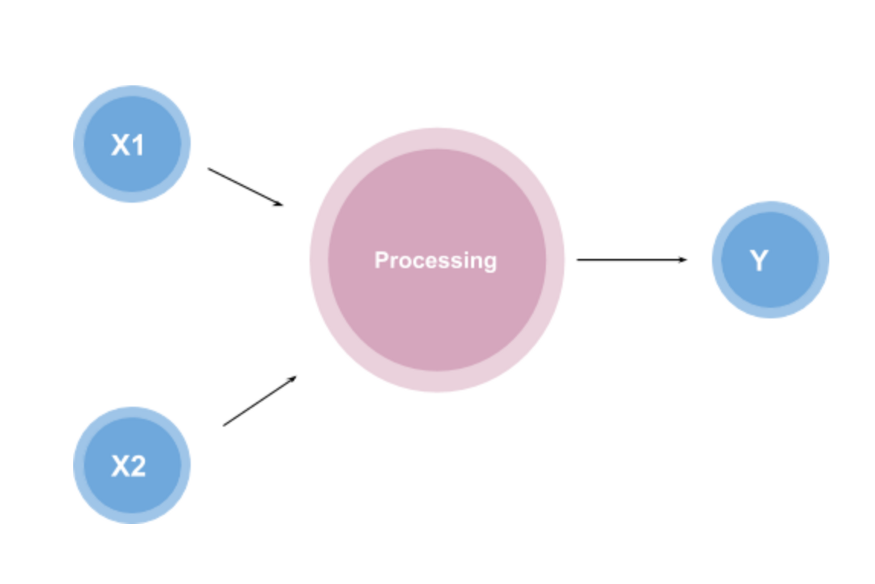

#Perceptron Algorithm
Now that we know what the w is supposed to do (defining a hyperplane the separates the data), let's look at how we can get such w.

#Perceptron Algorithm
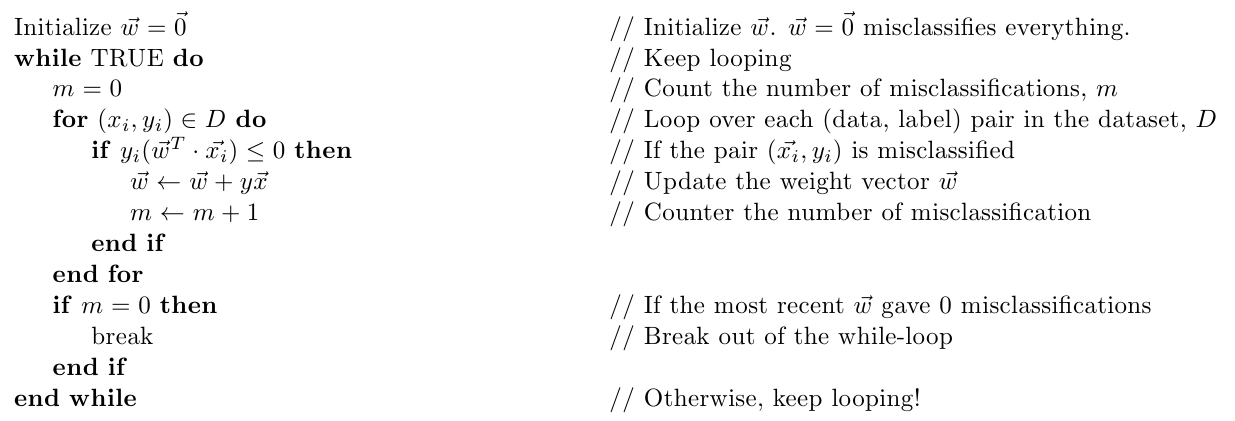


#Geometric Intuition

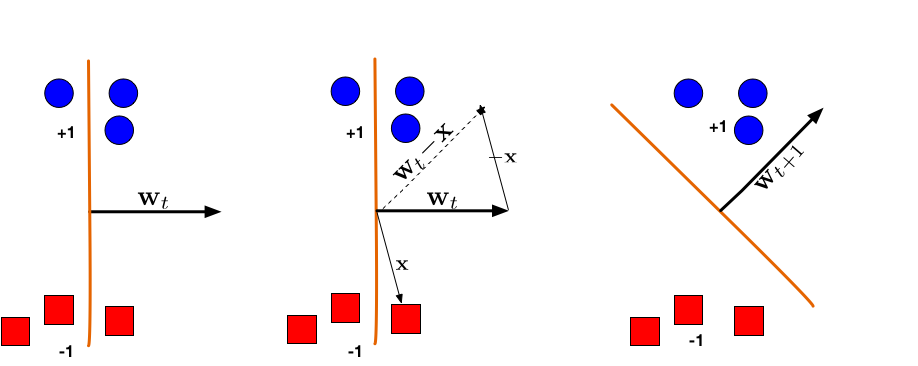

In [1]:
#code for perceptron 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import joblib
import pandas as pd
import numpy as np
class Perceptron:
    def __init__(self, eta, epochs) -> None:
        self.weights = np.random.randn(3)*1e-4
        print(f"initial weights before training : {self.weights}")
        self.eta = eta
        self.epochs = epochs
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)  #z = weight * input
        return np.where(z>0, 1,0 )
    def fit(self, x, y):
        self.x = x
        self.y = y
        x_with_bias = np.c_[self.x, -np.ones((len(self.x), 1))]
        print(f'x with bias: {x_with_bias}')
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch : {epoch}")
            print('--'*10)

            y_hat = self.activationFunction(x_with_bias, self.weights) #forward propogation
            print(f"predicated value after forward pass: {y_hat}")
            self.error = self.y - y_hat
            print(f"error: {self.error}")
            self.weights = self.weights + self.eta * np.dot(x_with_bias.T, self.error) #backward propogation
            print(f"updated weights after epoch: {epoch}/{self.epochs} : {self.weights}")
            print('#####'*10)
             
    def predict(self, x):
        x_with_bias = np.c_[x, -np.ones((len(x), 1))]
        return self.activationFunction(x_with_bias, self.weights)
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"total loss : {total_loss}")
        return total_loss

#Question 2:Document problems generally faced in training an ANN and their solution provided in the lecture with derivation.

#Answer 2: 
Vanishing gradient problem mostly occurs during the backpropagation when the value of the weights are changed. To understand the problem we will increase the value of the input values in the activation function, At that time we will notice that the predicted output is available on the range of the selected activation function and maintain the threshold value.

Exploding gradients are a problem when large error gradients accumulate and result in very large updates to neural network model weights during training.

#Question 3: Compare and document different available activation functions.

#Answer 3: 
Sigmoid Activation Function:
Sigmoid function is known as the logistic function which helps to normalize the output of any input in the range between 0 to 1.  The main purpose of the activation function is to maintain the output or predicted value in the particular range, which makes the good efficiency and accuracy of the model.

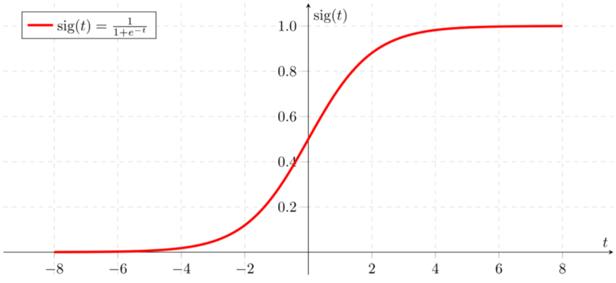

Hyperbolic Tangent Activation Function:
Tanh Activation function is superior then the Sigmoid Activation function because the range of this activation function is higher than the sigmoid activation function. This is the major difference between the Sigmoid and Tanh activation function. Rest functionality is the same as the sigmoid function like both can be used on the feed-forward network.

Range : -1 to 1
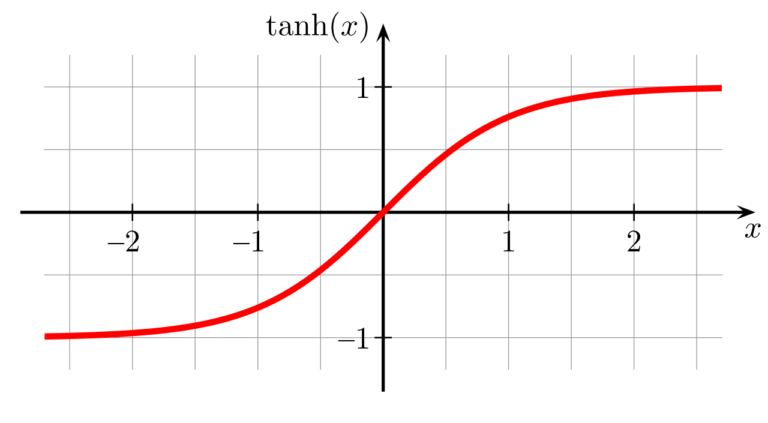

ReLu (Rectified Linear Unit) Activation Function
ReLu is the best and most advanced activation function right now compared to the sigmoid and TanH because all the drawbacks like Vanishing Gradient Problem is completely removed in this activation function which makes this activation function more advanced compare to other activation function.

Range: 0 to infinity

Equation can be created by:

{ xi if  x >=0

0 if x <=0 }

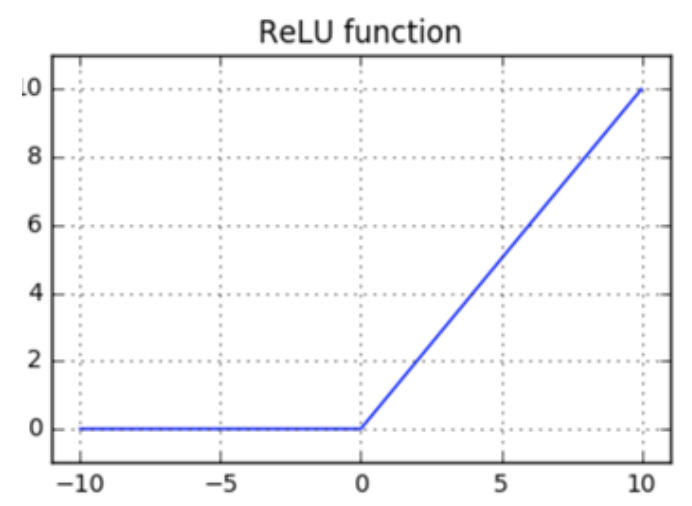

#Question 4:Compare and document different available weight initialization techniques.

#Answer 4:
#Weight Initialization Techniques
1. Zero Initialization
As the name suggests, all the weights are assigned zero as the initial value is zero initialization. This kind of initialization is highly ineffective as neurons learn the same feature during each iteration. Rather, during any kind of constant initialization, the same issue happens to occur. Thus, constant initializations are not preferred.

     Zero initialization can be implemented in Keras layers  in Python as follows:

2. In an attempt to overcome the shortcomings of Zero or Constant Initialization, random initialization assigns random values except for zeros as weights to neuron paths. However, assigning values randomly to the weights, problems such as Overfitting, Vanishing Gradient Problem, Exploding Gradient Problem might occur. 

3. Xavier/Glorot Initialization
In Xavier/Glorot weight initialization, the weights are assigned from values of a uniform distribution as follows:

  Xavier/Glorot Initialization often termed as Xavier Uniform Initialization, is suitable for layers where the activation function used is Sigmoid. 

4. Normalized Xavier/Glorot Initialization
In Normalized Xavier/Glorot weight initialization, the weights are assigned from values of a normal distribution as follow.

In [4]:
# Zero Initialization
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import initializers
 
initializer = tf.keras.initializers.Zeros()
layer = tf.keras.layers.Dense(
  3, kernel_initializer=initializer)

# Random Normal Distribution
initializer = tf.keras.initializers.RandomNormal(
mean=0., stddev=1.)
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

# Xavier/Glorot Uniform Initialization

initializer = tf.keras.initializers.GlorotUniform()
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)


#Question 5: Observe and document results before and after applying Transfer Learning.

#Answer 5: 
Transfer learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task.

To put it simply—a model trained on one task is repurposed on a second, related task as an optimization that allows rapid progress when modeling the second task.

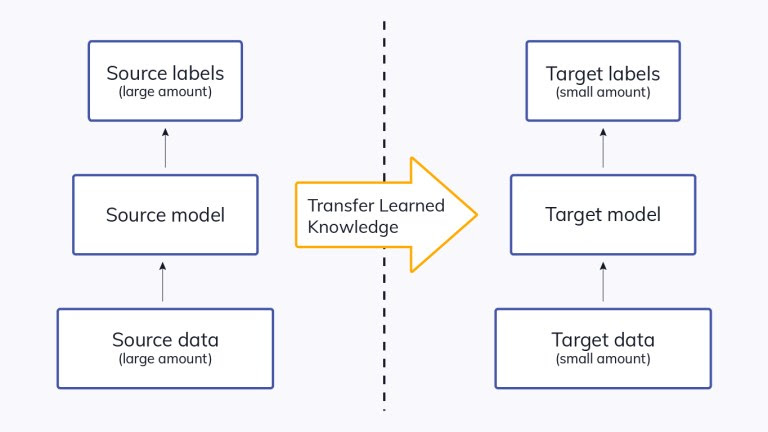


#Traditional Machine Learning vs.Transfer Learning

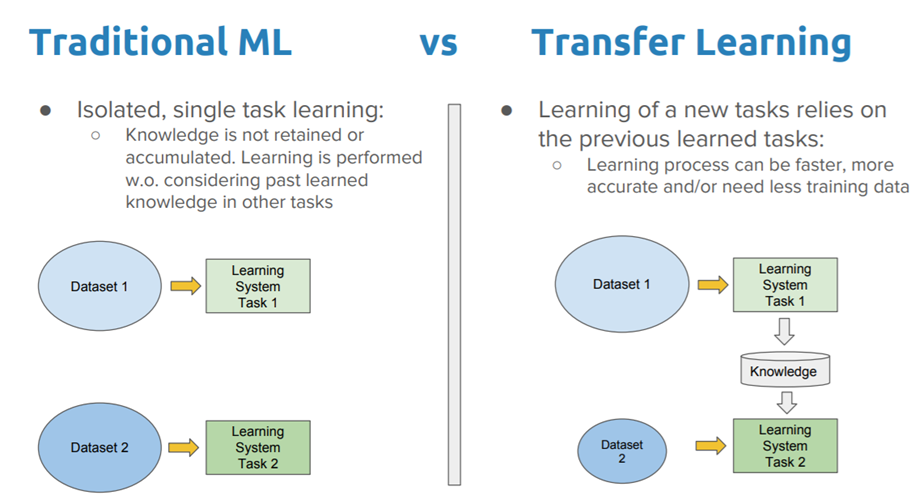




#Question 6:Observe and document use of Early Stopping and Check-pointing.

#Answer 6: Early Stopping
A problem with training neural networks is in the selection of the number of training epochs to use.

A lot of epochs can cause overfitting of the training dataset, while too few might have the outcome of an underfit problem. Early stopping is a strategy that facilitates you to mention an arbitrary large number of training epochs and stop training after the model performance ceases improving on a hold out validation dataset.

In this guide, you will find out the Keras API for including early stopping to overfit deep learning neural network models.

#check Points
In this approach, a snapshot of the state of the system is taken in case of system failure. If there is a problem, not all is lost. The checkpoint may be used directly or as the starting point for a new run, picking up where it left off.

When training deep learning models, the checkpoint is at the weights of the model. These weights can be used to make predictions as is or as the basis for ongoing training.

The Keras library provides a checkpointing capability by a callback API.

#Question 7:Compare and document different available Optimizers and their derivation.

#Answer 7:
#Batch gradient descent
Also known as vanilla gradient descent, it’s the most basic algorithm among the three. It computes the gradients of the objective function J with respect to the parameters θ for the entire training set.


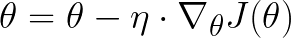

Formula to update weights in batch gradient descent. The gradients are multiplied by the learning rate η and then used to update the parameters of the network.
As we use the entire dataset to perform just one step, batch gradient descent can be very slow. Moreover, it is not suitable for datasets that don’t fit in memory.

#Stochastic gradient descent
It is an improved version of batch gradient descent. Instead of computing the gradients over the entire dataset, it performs a parameter update for each example in the dataset.

So the formula now depends also on the values of the input x and output y.

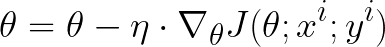


Formula to update weights in SGD
The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training.


#Mini batch gradient descent
The intuition behind this algorithm is to exploit the advantages of both gradient descent’s methods that we have seen so far.

It basically computes the gradients on small batches of data in order to reduce the variance of the updates.
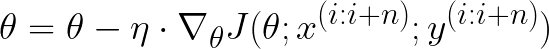

Formula to update weights in mini batch gradient descent

#Question 8:Observe and document the use of various loss functions.

#Answer 8:
#Mean Absolute Error (MAE)

Mean absolute error (MAE) also called L1 Loss is a loss function used for regression problems. It represents the difference between the original and predicted values extracted by averaging the absolute difference over the data set.
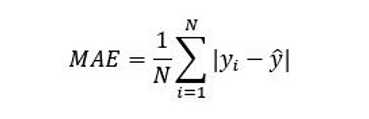

#Sparse Categorical Cross-Entropy
parse categorical cross-entropy has the same loss function as, categorical cross-entropy which we have mentioned above. The only difference is the format in which we mention 𝑌𝑖(i,e true labels).


If your Yi’s are one-hot encoded, use categorical_crossentropy. Examples for a 3-class classification: [1,0,0] , [0,1,0], [0,0,1]


But if your Yi’s are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]

#Categorical Cross-Entropy

Categorical cross-entropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.


Formally, it is designed to quantify the difference between two probability distributions.

If 𝑀>2 (i.e. multiclass classification), we calculate a separate loss for each class label per observation and sum the result.
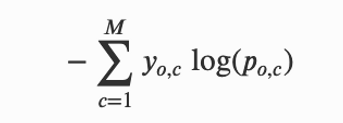

#Binary Cross-Entropy

Binary cross-entropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right).

In binary classification, where the number of classes M equals 2, cross-entropy can be calculated as:

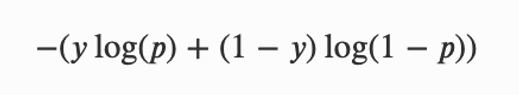



#Question 9: MNIST NUMBER DATASET

#MNIST Digit Classification with a Fully-Connected Neural Network
Technologies: Python, NumPy, Matplotlib, TensforFlow, Keras

#1. Import Statements

In [38]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


#2. Data Preprocessing

The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [39]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [40]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 784)
Testing Images: (10000, 784)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


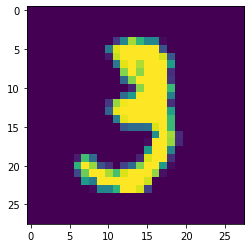

In [41]:
plt.imshow(train_images[10])
plt.show()

#3. Neural Network

In [42]:
# Define the sequential model.
model = tf.keras.models.Sequential()
# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Show the model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the Model
We then train the model on 10 epochs, using a batch size of 256.

In [44]:
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.3210 - accuracy: 0.9105 - val_loss: 0.1736 - val_accuracy: 0.9513
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1349 - accuracy: 0.9615 - val_loss: 0.1101 - val_accuracy: 0.9689
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0900 - accuracy: 0.9746 - val_loss: 0.0892 - val_accuracy: 0.9728
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0651 - accuracy: 0.9814 - val_loss: 0.0782 - val_accuracy: 0.9750
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0503 - accuracy: 0.9857 - val_loss: 0.0710 - val_accuracy: 0.9767
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0386 - accuracy: 0.9894 - val_loss: 0.0669 - val_accuracy: 0.9799
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0307 - accuracy: 0.9920 - val_loss: 0.0646 - val_accuracy: 0.9797
Epoch

#Display the Metrics
Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9803
Test Accuracy: 0.9803000092506409
Test Loss: 0.06257042288780212


In [46]:
# Save the metrics.
metrics = history.history

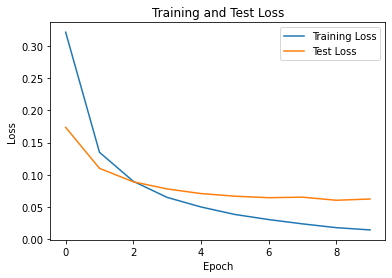

In [47]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

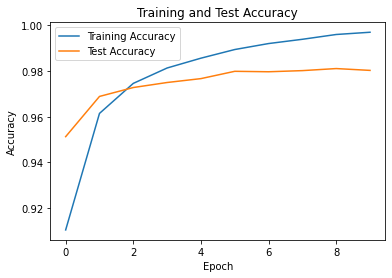

In [48]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

#Make a Prediction

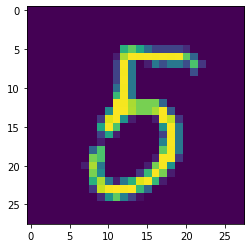

In [49]:
# Make predictions with the trained model.
predictions = model.predict(X_test)
#Finally, we can show a random test image with its corresponding prediction.

# Choose an index.
index = 45

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [50]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 5


##MNIST FASHION DATASET

#MNIST Fashion Item Classification with a Fully-Connected Neural Network
Technologies: Python, NumPy, Matplotlib, TensforFlow, Keras

#1. Import Statements

In [51]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


#2. Data Preprocessing
The first step is to preprocess our data. Here, we load the MNIST fashion dataset from the Keras datasets library, split it into training and test sets, and normalize the matrices.

In [52]:
# Load the MNIST dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist
train_data, test_data = fashion_mnist.load_data()
# Divide the data into features and labels.
train_images, y_train = train_data
test_images, y_test = test_data
# Normalize the images.
X_train = train_images.astype('float32') / 255
X_test = test_images.astype('float32') / 255

4431872/4422102 [==============================] - 0s 0us/step


Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST fashion item.

Training Images: (60000, 28, 28)
Testing Images: (10000, 28, 28)
Training Labels: (60000,)
Test Labels: (10000,)


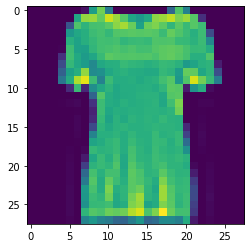

In [54]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

# Show a sample MNIST fashion item.
plt.imshow(train_images[10])
plt.show()

Finally, we define the corresponding item names for each class.

In [55]:
# Define the class names.
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#3. Neural Network

#Define the Model
We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [56]:
# Define the sequential model.
model = tf.keras.models.Sequential()
# Define the network's layes.
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Show the model.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [58]:
# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
We then train the model on 20 epochs, using a batch size of 256.

In [59]:
# Define the parameters.
num_epochs = 20
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.6053 - accuracy: 0.7976 - val_loss: 0.4760 - val_accuracy: 0.8369
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4255 - accuracy: 0.8519 - val_loss: 0.4244 - val_accuracy: 0.8524
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3825 - accuracy: 0.8665 - val_loss: 0.4120 - val_accuracy: 0.8563
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8745 - val_loss: 0.3955 - val_accuracy: 0.8626
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8809 - val_loss: 0.3785 - val_accuracy: 0.8658
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8860 - val_loss: 0.3747 - val_accuracy: 0.8648
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3073 - accuracy: 0.8902 - val_loss: 0.3656 - val_accuracy: 0.8689
Epoch 

#Display the Metrics
 Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8879
Test Accuracy: 0.8878999948501587
Test Loss: 0.3212885558605194


In [63]:
# Save the metrics.
metrics = history.history

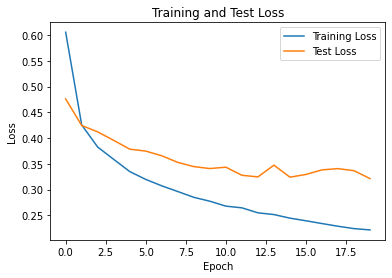

In [64]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

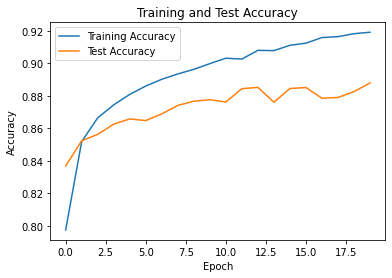

In [65]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

#Make a Prediction
Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

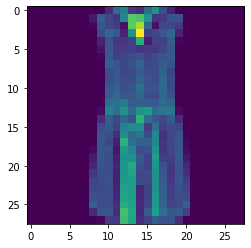

In [66]:
# Make predictions with the trained model.
predictions = model.predict(X_test)


# Choose an index.
index = 75

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [67]:
print("Prediction:", class_names[np.argmax(predictions[index])])

Prediction: Dress
